[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/180131_logistic_regression.ipynb)

# Logistic Regression

In [1]:
!pip install torch torchvision

## Iris Dataset

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* LogisticRegressionはlogitsを返してsoftmaxを通さないので注意
* loss関数のほうにsoftmaxが入る
* なので見た目はLinearRegressionとまったく同じ
* 入力は FloatTensor ラベルは LongTensor である必要がある
* TODO: DataSetとDataLoaderを使って書き直す
* Validで精度を求める

In [3]:
# hyperparameters
input_size = 4
num_classes = 3
num_epochs = 10000
learning_rate = 0.01

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
model

LogisticRegression(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)

In [6]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).long()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long()

    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    # 精度を求める
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == targets.data).float().sum()
    val_acc = correct / targets.size(0)

    return val_loss.item(), val_acc

In [7]:
loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)
    
    if epoch % 1000 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 1.4626 val_loss: 1.4435 val_acc: 0.0200
epoch 1000, loss: 0.3262 val_loss: 0.3419 val_acc: 0.9200
epoch 2000, loss: 0.2556 val_loss: 0.2740 val_acc: 0.9400
epoch 3000, loss: 0.2151 val_loss: 0.2380 val_acc: 0.9400
epoch 4000, loss: 0.1877 val_loss: 0.2137 val_acc: 0.9400
epoch 5000, loss: 0.1677 val_loss: 0.1960 val_acc: 0.9400
epoch 6000, loss: 0.1525 val_loss: 0.1824 val_acc: 0.9400
epoch 7000, loss: 0.1406 val_loss: 0.1717 val_acc: 0.9400
epoch 8000, loss: 0.1309 val_loss: 0.1630 val_acc: 0.9400
epoch 9000, loss: 0.1229 val_loss: 0.1558 val_acc: 0.9400


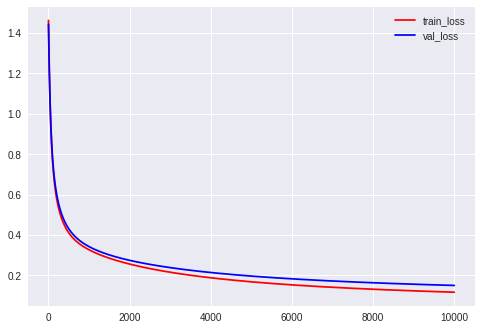

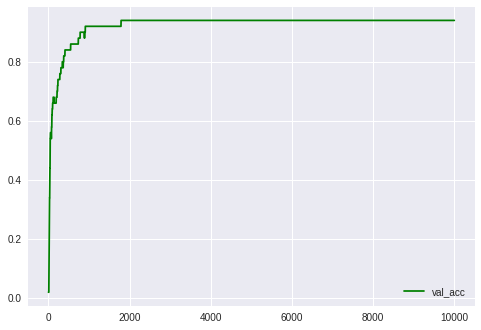

In [8]:
# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()

## MNIST

* MNISTはPyTorchの標準機能でデータセットをダウンロードできる
* バッチ単位で読み込めるDataLoaderも簡単に使える

In [9]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [10]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [11]:
print(len(train_dataset))
print(len(test_dataset))

# 1データだけ取得
image, label = iter(train_loader).next()
print(image.type(), label.type())
print(image.size(), label.size())

60000
10000
torch.FloatTensor torch.LongTensor
torch.Size([100, 1, 28, 28]) torch.Size([100])


In [12]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss = running_loss / len(train_loader)
    
    return train_loss


def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = images.view(-1, 28 * 28)

        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = outputs.max(1, keepdim=True)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
        total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    
    return val_loss, val_acc

In [14]:
loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.0364 val_loss: 1.7857 val_acc: 0.7109
epoch 1, loss: 1.6188 val_loss: 1.4498 val_acc: 0.7844
epoch 2, loss: 1.3514 val_loss: 1.2316 val_acc: 0.8097
epoch 3, loss: 1.1741 val_loss: 1.0837 val_acc: 0.8232
epoch 4, loss: 1.0506 val_loss: 0.9779 val_acc: 0.8320
epoch 5, loss: 0.9603 val_loss: 0.8991 val_acc: 0.8382
epoch 6, loss: 0.8916 val_loss: 0.8383 val_acc: 0.8423
epoch 7, loss: 0.8376 val_loss: 0.7897 val_acc: 0.8482
epoch 8, loss: 0.7940 val_loss: 0.7502 val_acc: 0.8528
epoch 9, loss: 0.7579 val_loss: 0.7171 val_acc: 0.8570
epoch 10, loss: 0.7275 val_loss: 0.6891 val_acc: 0.8595
epoch 11, loss: 0.7016 val_loss: 0.6651 val_acc: 0.8618
epoch 12, loss: 0.6791 val_loss: 0.6442 val_acc: 0.8649
epoch 13, loss: 0.6595 val_loss: 0.6258 val_acc: 0.8669
epoch 14, loss: 0.6421 val_loss: 0.6095 val_acc: 0.8685
epoch 15, loss: 0.6266 val_loss: 0.5949 val_acc: 0.8705
epoch 16, loss: 0.6127 val_loss: 0.5818 val_acc: 0.8716
epoch 17, loss: 0.6001 val_loss: 0.5699 val_acc: 0.8730
ep

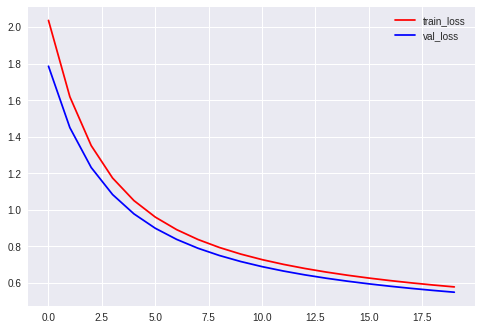

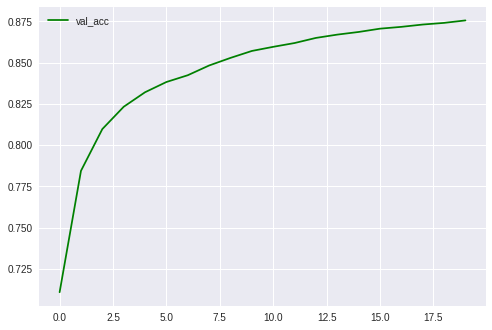

In [15]:
import matplotlib.pyplot as plt

# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()